<a href="https://colab.research.google.com/github/Epistimonas/imagenes/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.1.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
len(train_labels)

60000

In [37]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

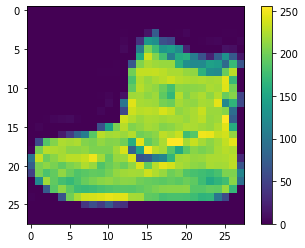

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

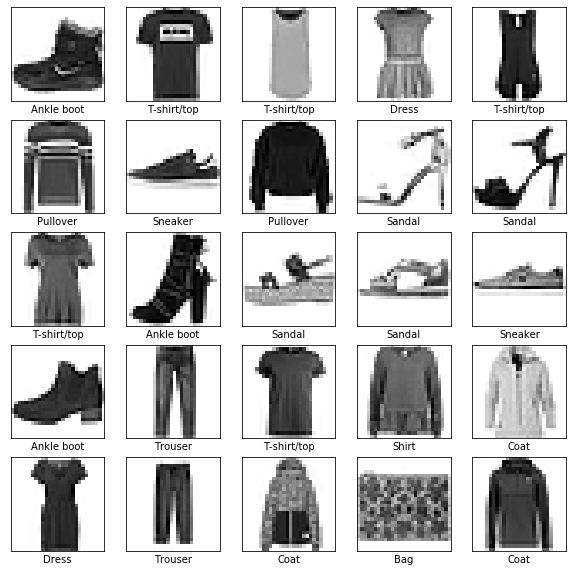

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4940 - accuracy: 0.8272
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3713 - accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3334 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3121 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2931 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2803 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2663 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2566 - accuracy: 0.9057
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2485 - accuracy: 0.9068
Epoch 10/10
60

In [46]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3363 - accuracy: 0.8831

Test accuracy: 0.8831


In [0]:
predictions = model.predict(test_images)

In [48]:
predictions[0]

array([1.3060448e-07, 2.7892710e-12, 2.7587990e-09, 9.2361535e-13,
       1.6210753e-09, 4.0643601e-05, 1.2258435e-08, 5.1423279e-03,
       1.1160879e-08, 9.9481684e-01], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

In [50]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

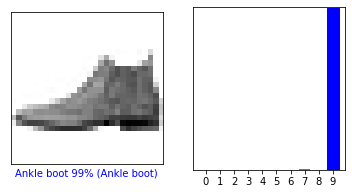

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

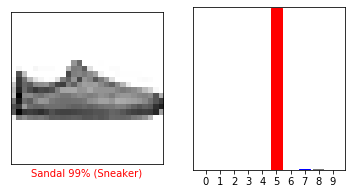

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

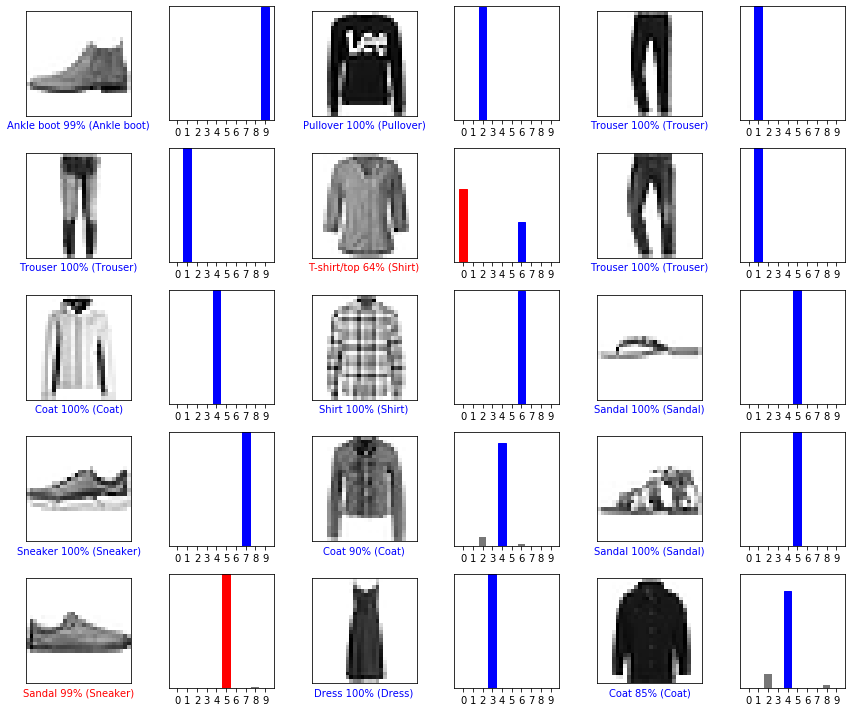

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2950662e-03 2.8838327e-12 9.9673456e-01 6.8589595e-13 1.8346675e-03
  2.5065210e-12 1.3575032e-04 7.7123898e-11 4.6556373e-11 1.2957157e-13]]


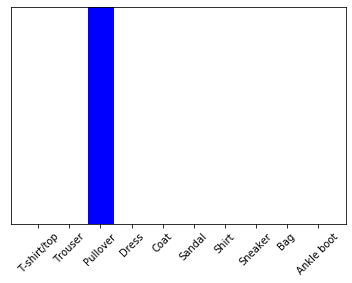

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
np.argmax(predictions_single[0])

2